# One-number metric (Wasserstein distance?)

In [1]:
# Standard imports
import json
from pathlib import Path
import os
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from typing import List, Iterable, Tuple
import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

In [1]:
class LossDistribution():
    def __init__(self, filepath: str) -> None:
        with open(filepath) as file:
            results = json.load(file)

        self.filepath = filepath
        self.label = Path(filepath).stem

        self.forward = np.array(results["forward"])
        self.backward = np.array(results["backward"])

        self.num_runs = self.forward.shape[0]
        self.num_epochs = self.forward.shape[1]

        assert self.forward.ndim == self.backward.ndim == 2
        assert self.forward.shape == self.backward.shape
    
    def plot_learning_curves(self, runs: Iterable[int] = []) -> None:
        if not runs:
            runs = range(self.num_runs)

        for losses in self.forward[runs]:
            plt.plot(losses, label="forward", color="blue", alpha=0.5)
        for losses in self.backward[runs]:
            plt.plot(losses, label="backward", color="orange", alpha=0.5)
            
        plt.legend(handles=[mpatches.Patch(color="blue", label="forward"),
                            mpatches.Patch(color="orange", label="backward")])

        plt.grid()
        plt.title(self.label)
        plt.xlabel("epoch_number")
        plt.ylabel("loss")
        plt.yscale("log")
        plt.show()

    def at_epoch(self, epoch: int) -> Tuple[NDArray, NDArray]:
        """Return array of losses at the same epoch, but different runs"""
        return self.forward[:, epoch], self.backward[:, epoch]
    
    def plot_distribution_at_epoch(self, epoch: int) -> None:
        f, b = self.at_epoch(epoch)
        
        plt.hist(f, alpha=0.5, edgecolor="black", label="forward")
        plt.hist(b, alpha=0.5, edgecolor="black", label="backward")
        
        plt.title(self.label + f" at epoch {epoch}")
        plt.xlabel("loss")
        plt.grid()
        plt.legend()
        plt.show()

    def wasserstein(self, epoch: int) -> float:
        return wasserstein_distance(self.forward[:, epoch], self.backward[:, epoch])

    def wasserstein_all(self) -> List[float]:
        return [self.wasserstein(epoch) for epoch in range(self.num_epochs)]

    def plot_wasserstein_vs_epoch(self, include_zeroth_epoch: bool = False) -> None:
        wasserstein_array = self.wasserstein_all()
        
        plt.plot(wasserstein_array, "o-")    
        plt.grid()
        plt.title(self.label)
        plt.xlabel("epoch_number")
        plt.ylabel("wasserstein_distance")
        
        if not include_zeroth_epoch:
            plt.ylim(ymin=min(wasserstein_array) * 0.9, ymax=max(wasserstein_array[1:]) * 1.2)
            
        plt.show()
        
    def relmeandiff_at_epoch(self, epoch: int) -> float:
        f, b = self.at_epoch(epoch)
        f_mean, b_mean = f.mean(), b.mean()
        return (b_mean - f_mean) / ((f_mean + b_mean) / 2)
    
    def relmeandiff_all(self) -> List[float]:
        return [self.relmeandiff_at_epoch(e) for e in range(self.num_epochs)]
        
    def plot_relmeandiff_vs_epoch(self) -> None:
        plt.plot(self.relmeandiff_all(), "o-")    
        plt.grid()
        plt.title(self.label)
        plt.xlabel("epoch_number")
        plt.ylabel("relative difference in mean loss")  
        plt.show()

NameError: name 'Iterable' is not defined

In [3]:
def all_plots_for_datafile(filepath: str) -> None:
    l = LossDistribution(filepath)
    l.plot_learning_curves()
    l.plot_wasserstein_vs_epoch()
    for epoch in [0, 5, 10, 20, 30]:
        l.plot_distribution_at_epoch(epoch)
    l.plot_relmeandiff_vs_epoch()

## lorenz_size=13_window_len=5

In [4]:
l = LossDistribution("20230507_distributions/lorenz_size=13_window_len=5.json")

## lorenz_size=13_window_len=12

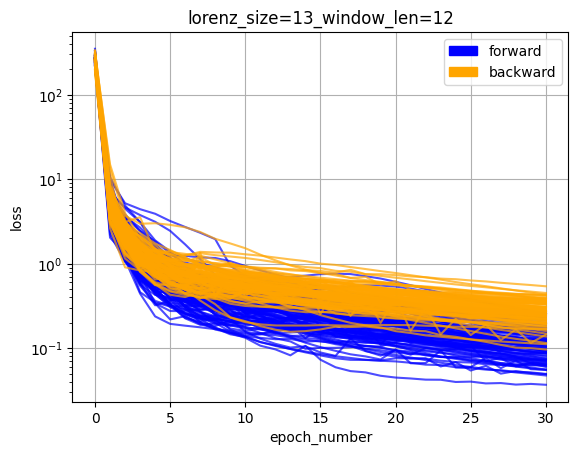

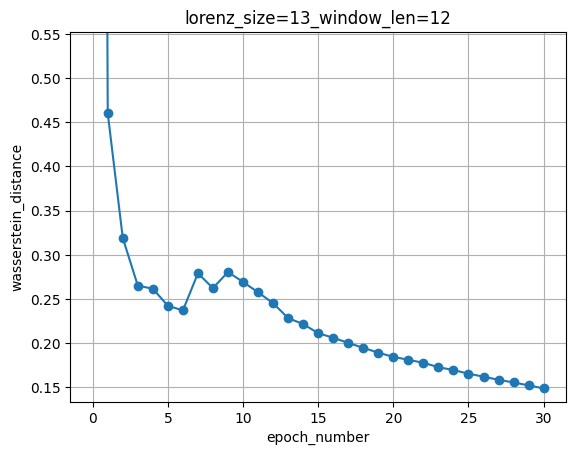

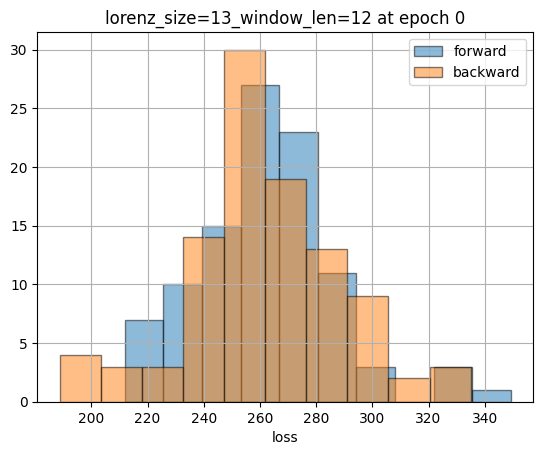

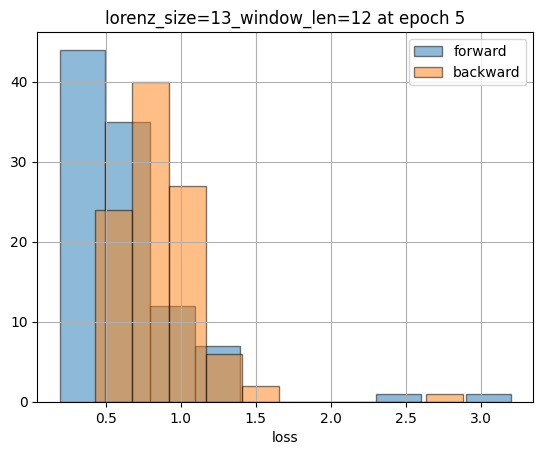

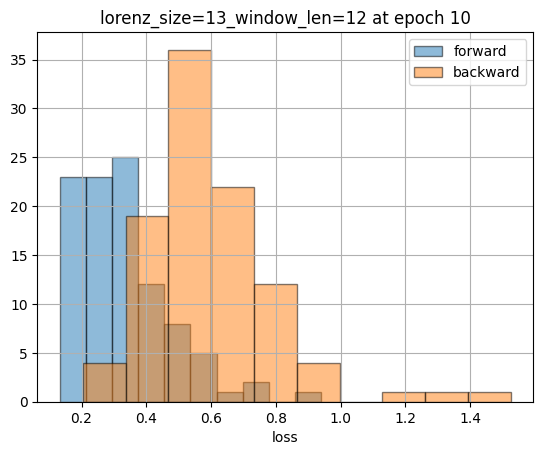

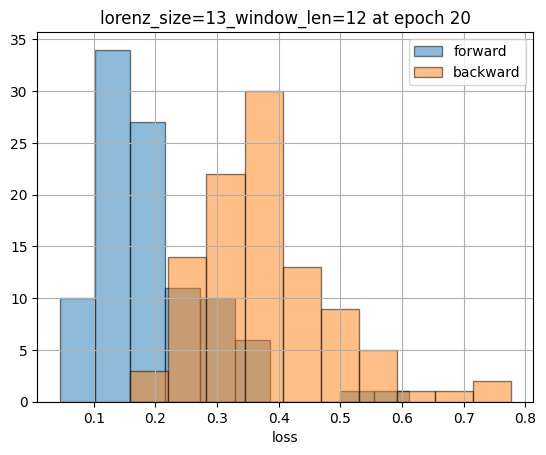

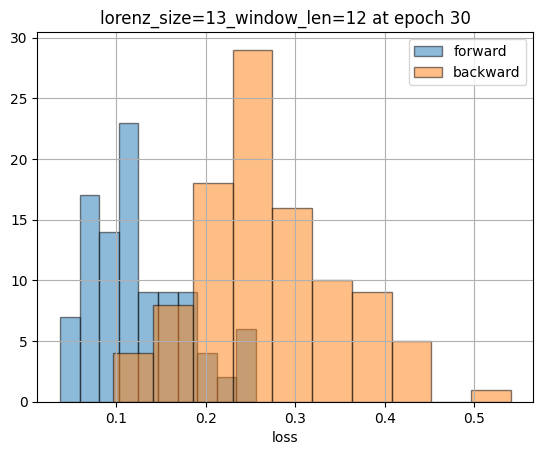

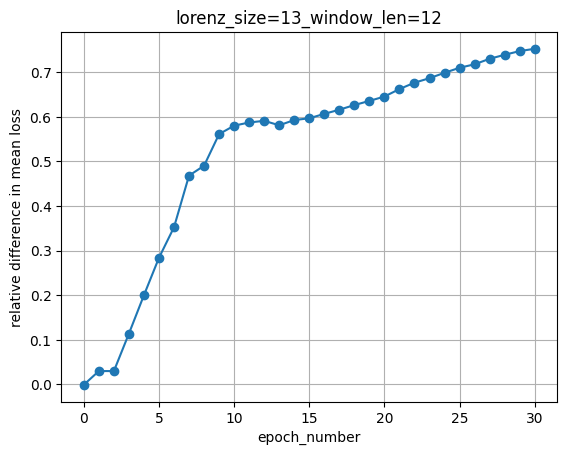

In [5]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=12.json")

## lorenz_size=13_window_len=25

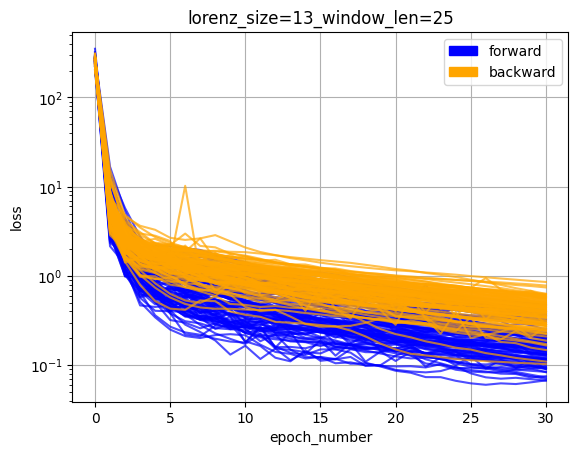

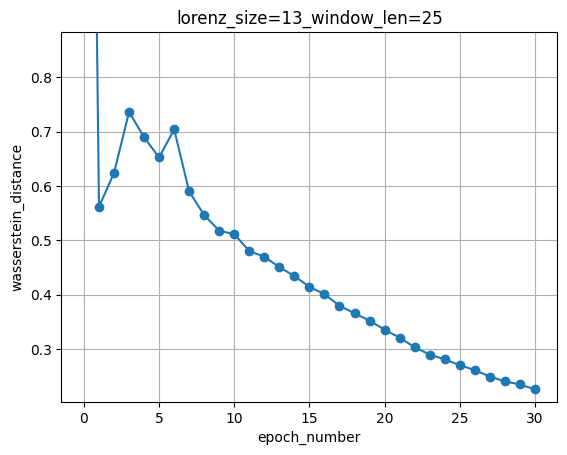

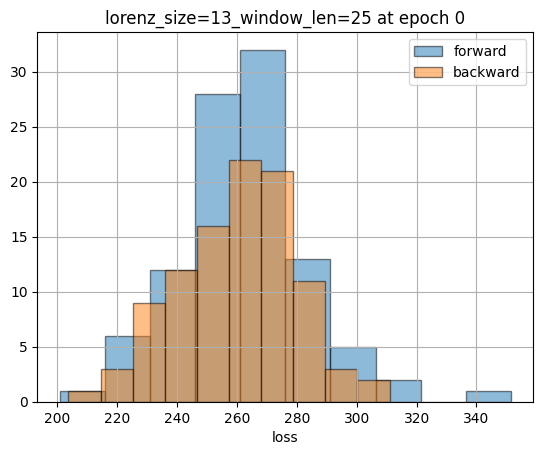

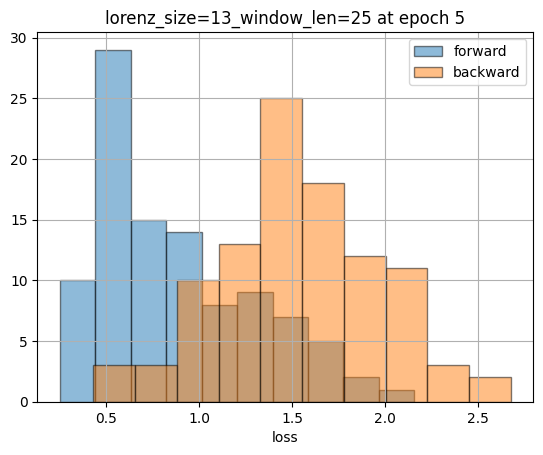

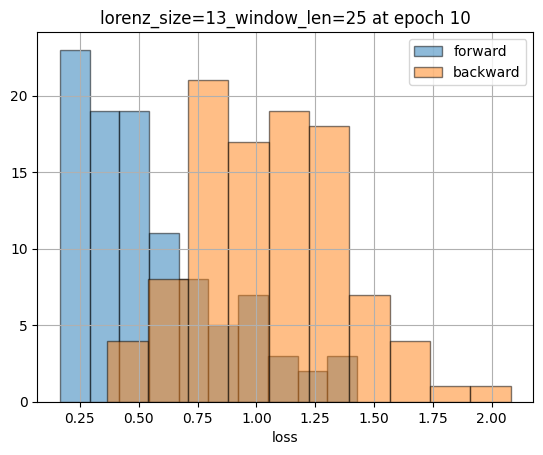

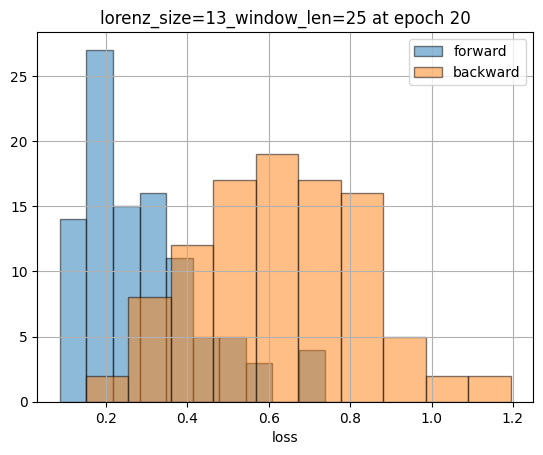

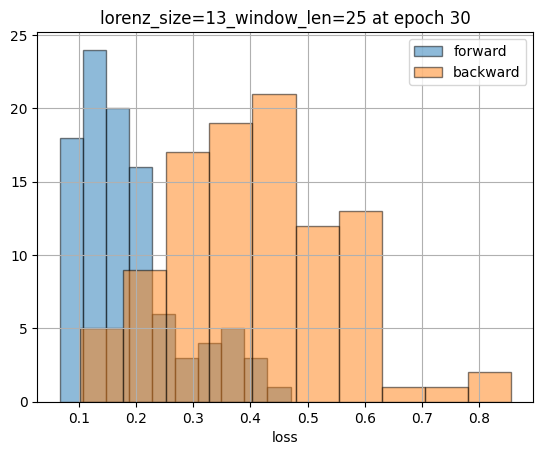

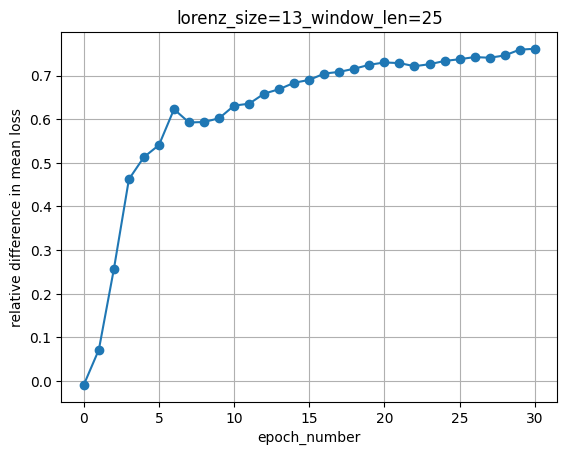

In [6]:
all_plots_for_datafile("20230507_distributions/lorenz_size=13_window_len=25.json")

## kepler_size=13_window_len=5

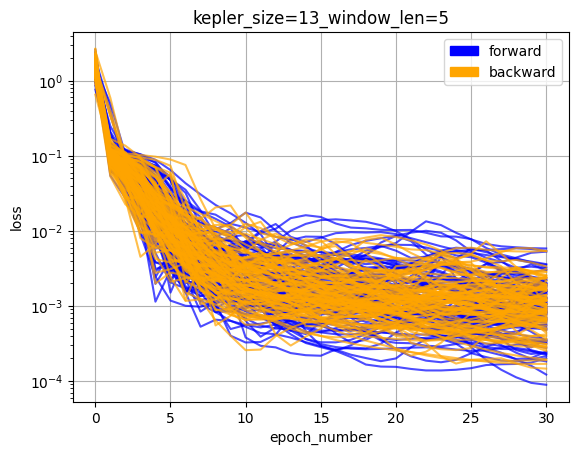

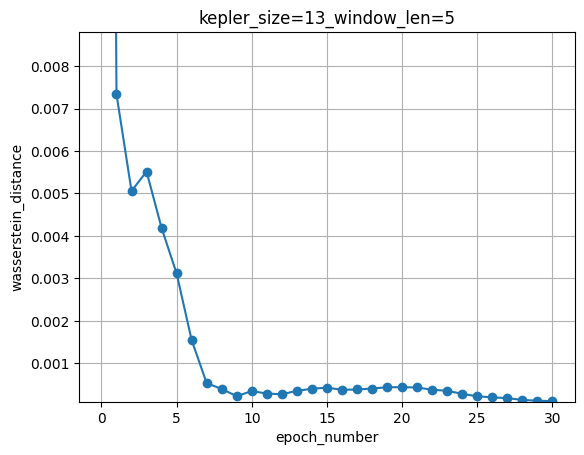

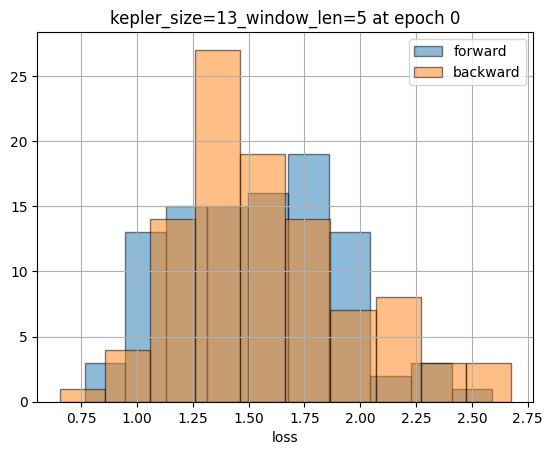

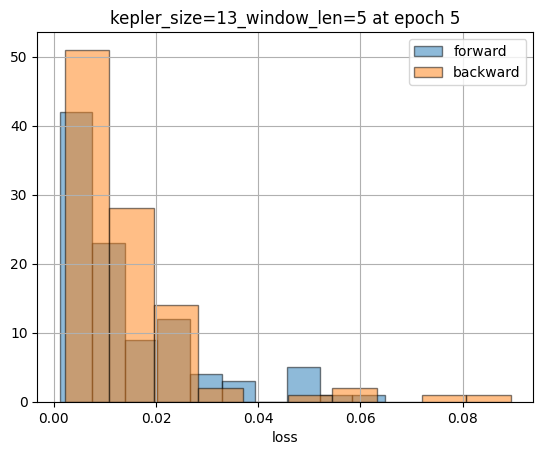

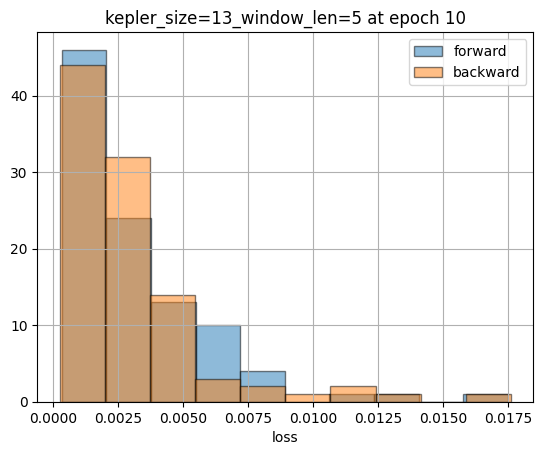

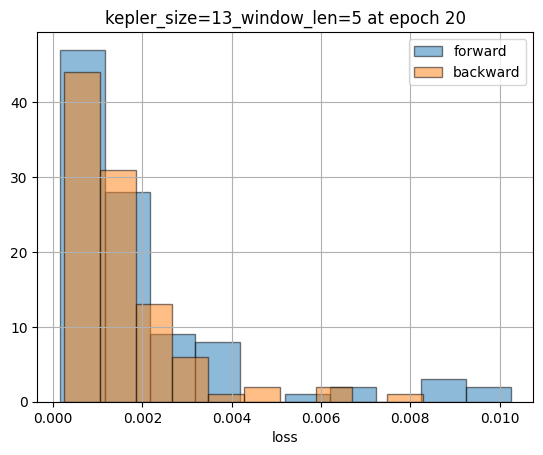

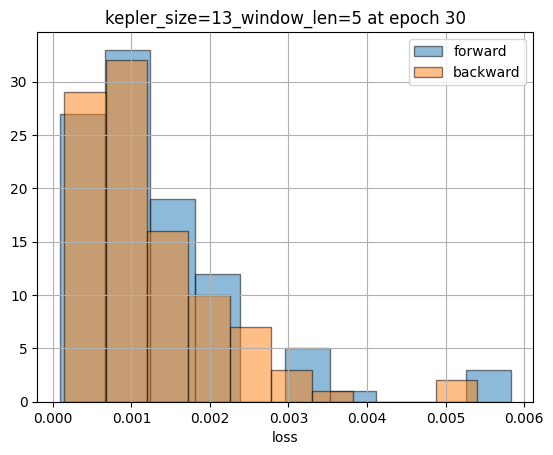

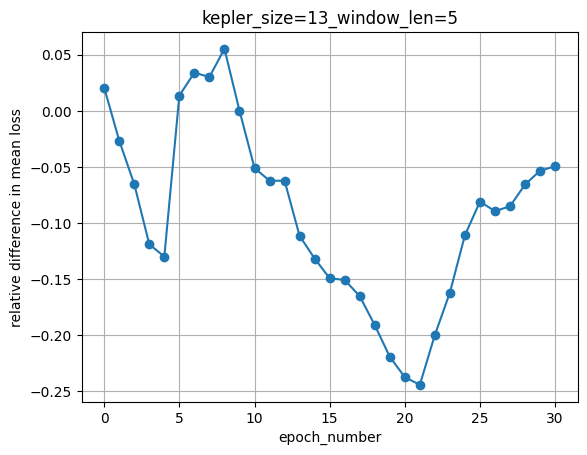

In [7]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=5.json")

## kepler_size=13_window_len=12

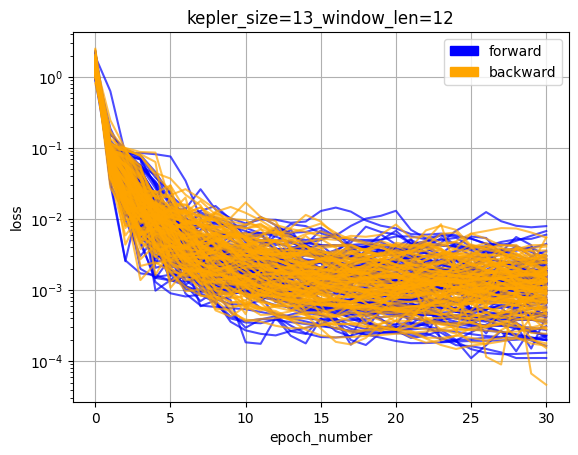

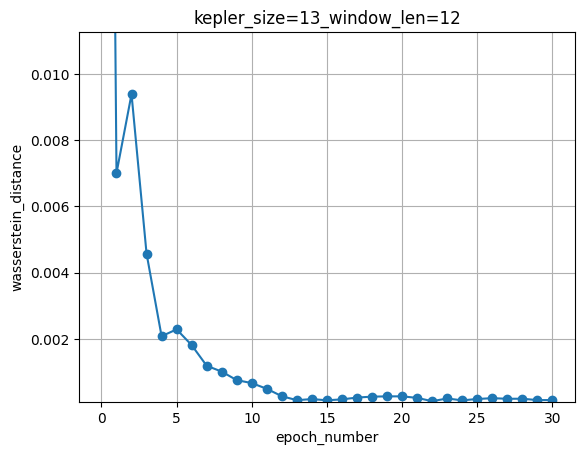

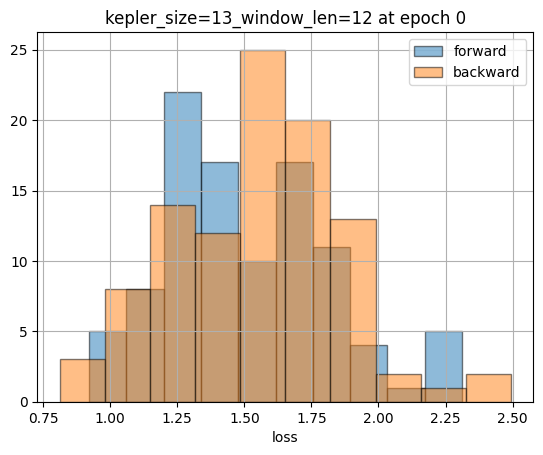

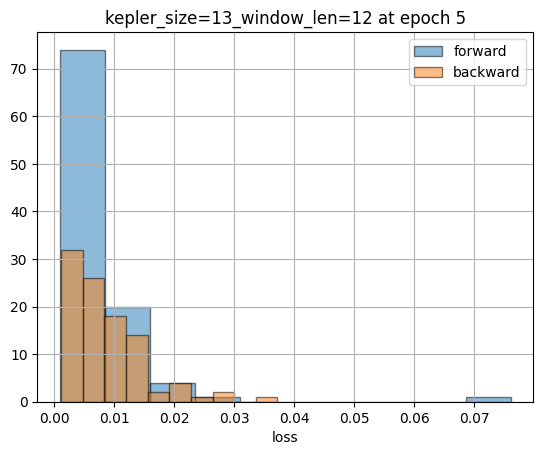

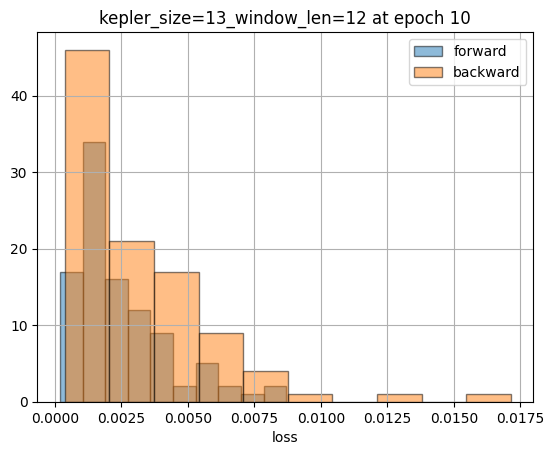

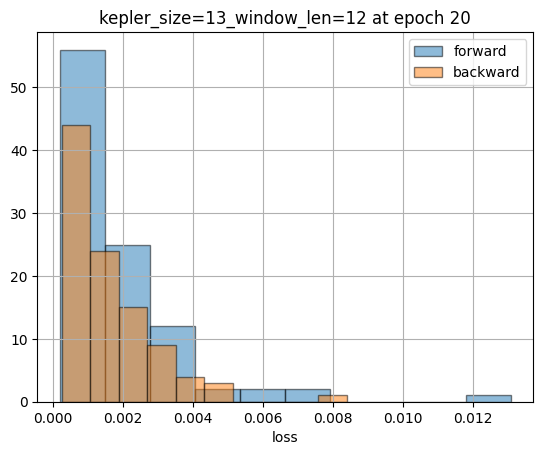

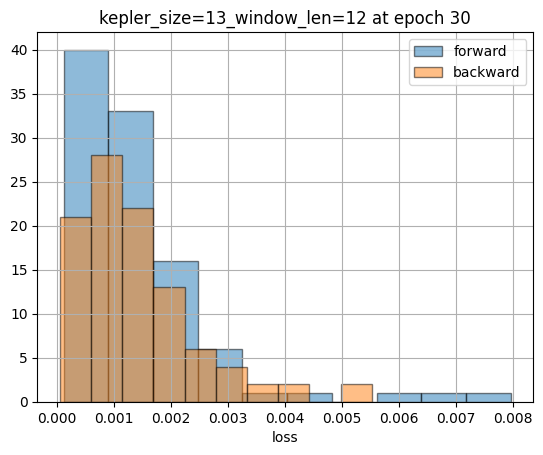

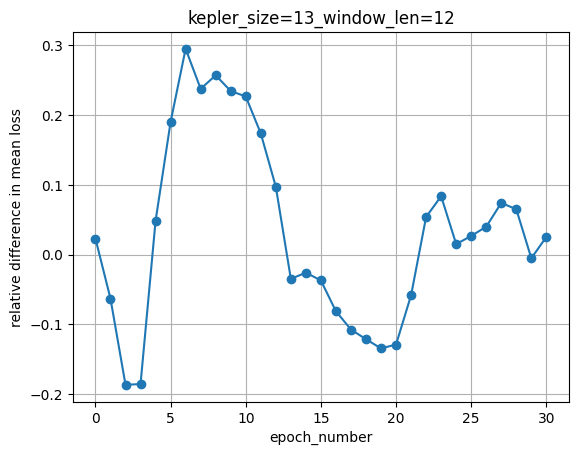

In [8]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=12.json")

## kepler_size=13_window_len=25

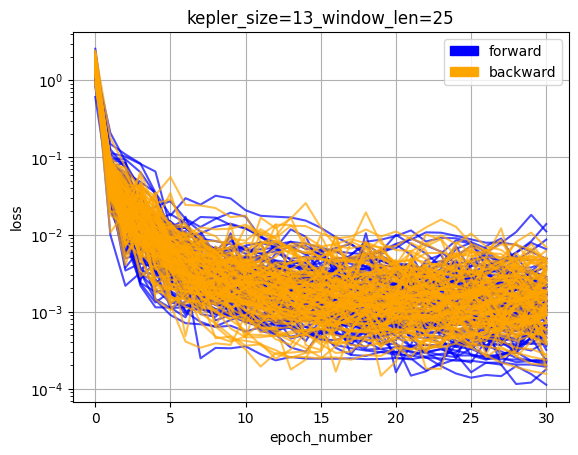

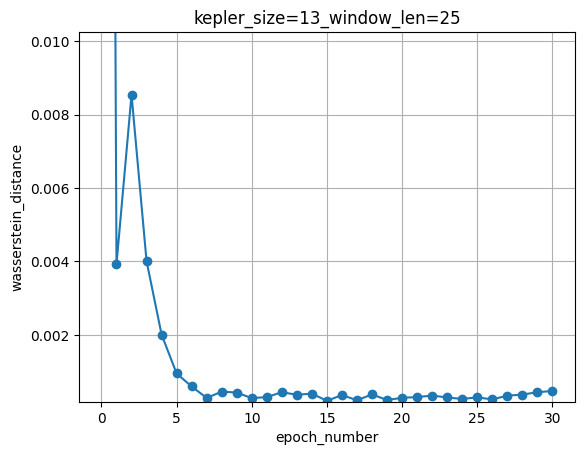

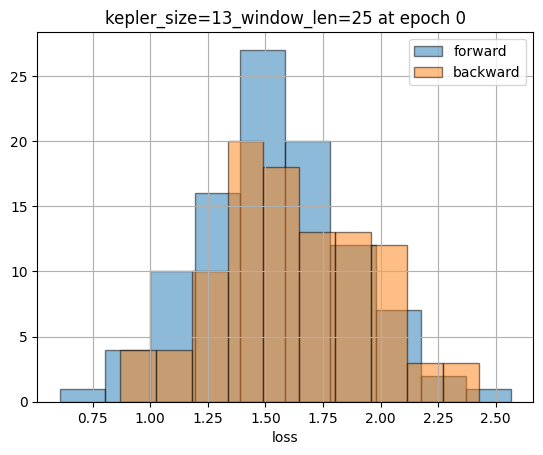

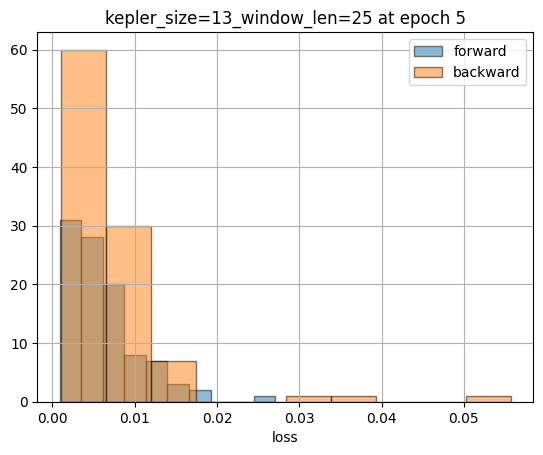

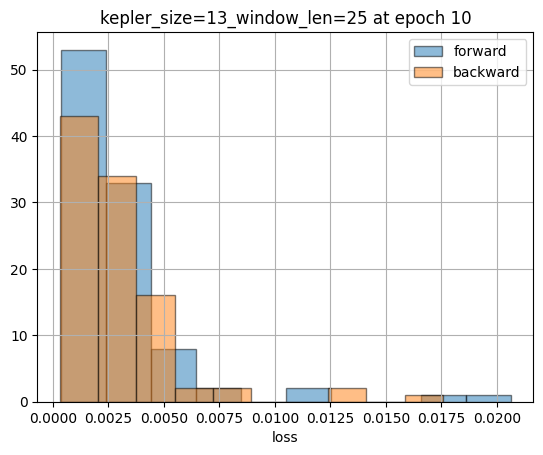

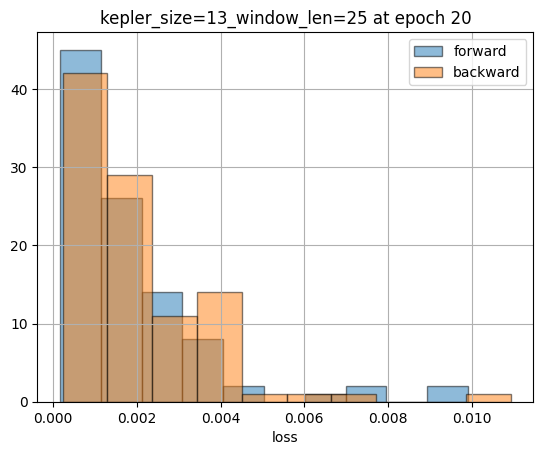

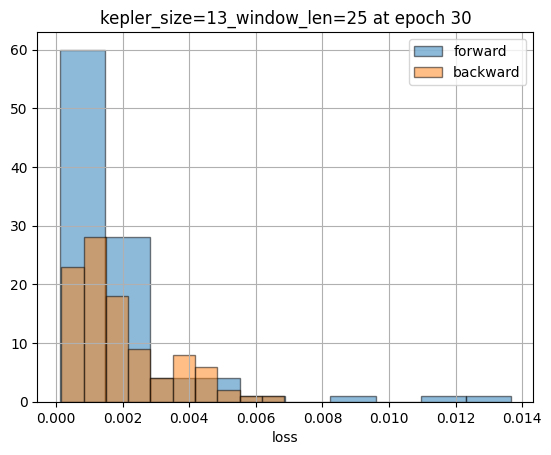

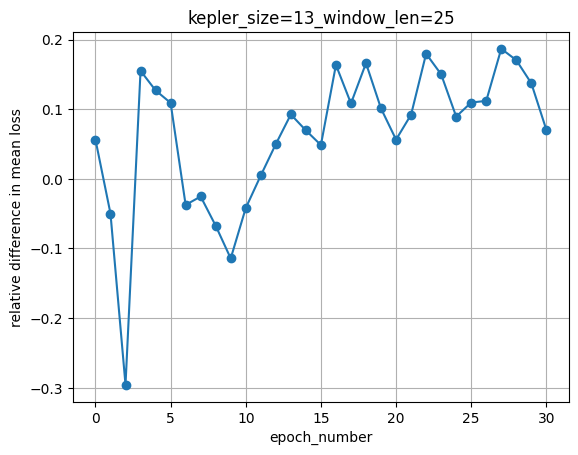

In [9]:
all_plots_for_datafile("20230507_distributions/kepler_size=13_window_len=25.json")

## belousovzhabotinsky_size=13_window_len=5

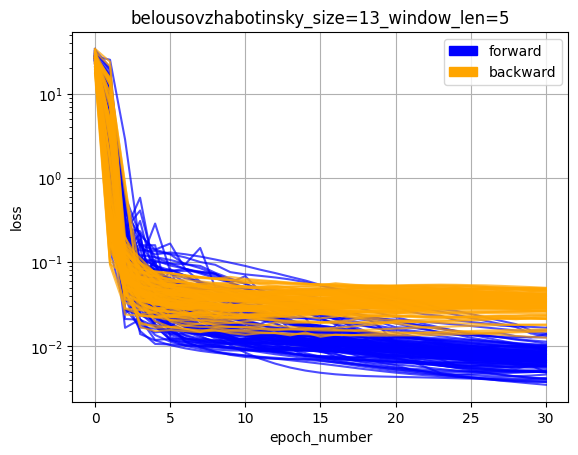

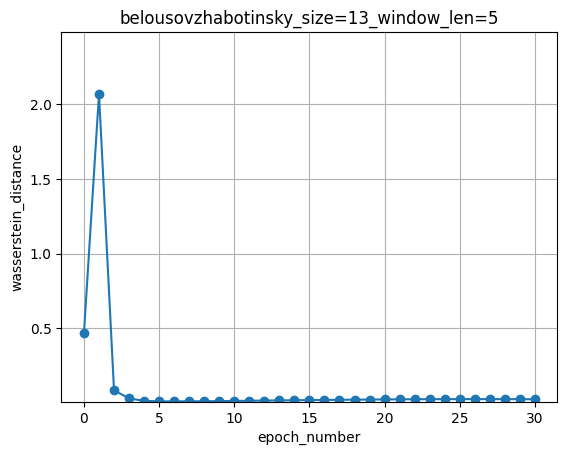

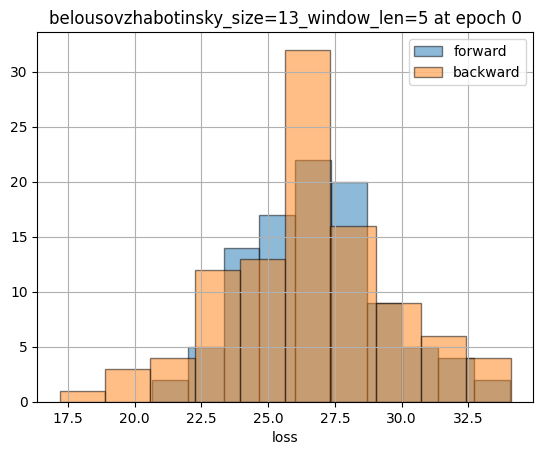

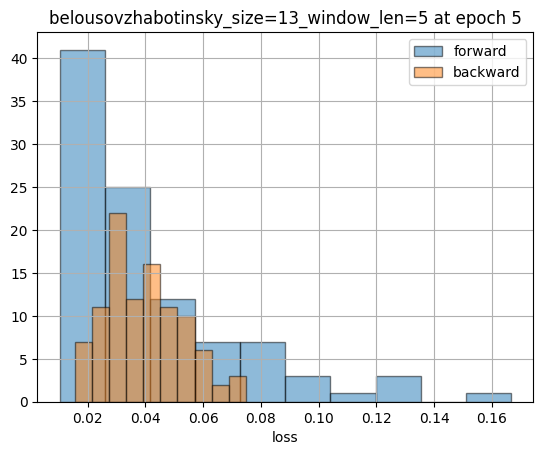

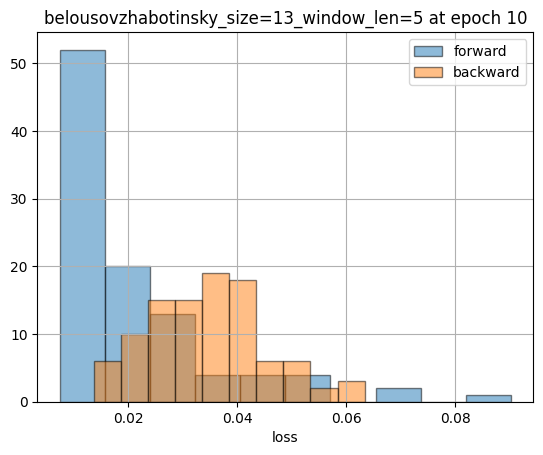

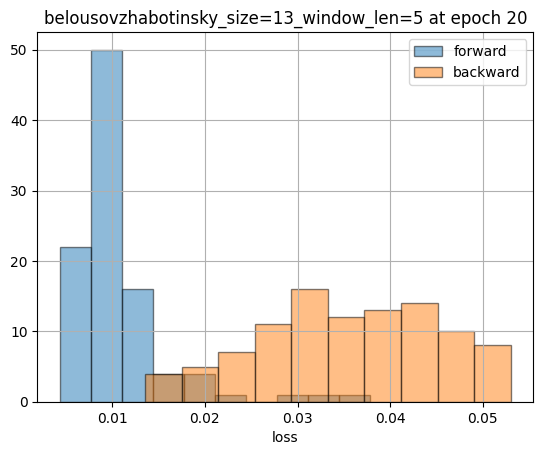

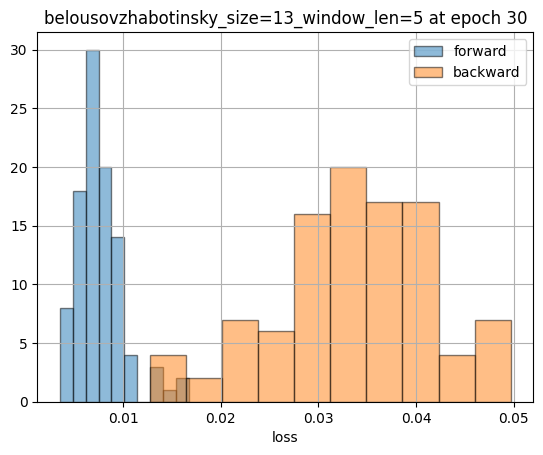

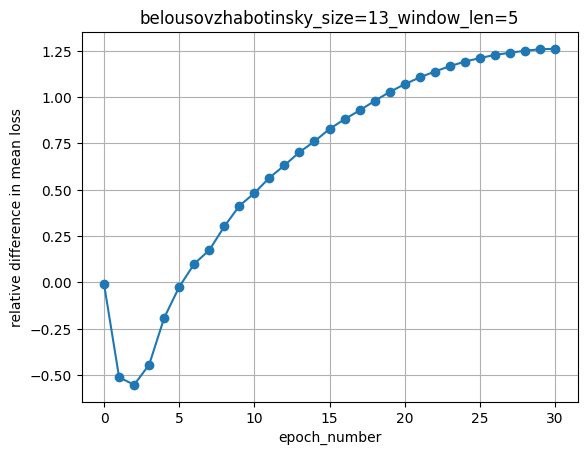

In [10]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=5.json")

## belousovzhabotinsky_size=13_window_len=12

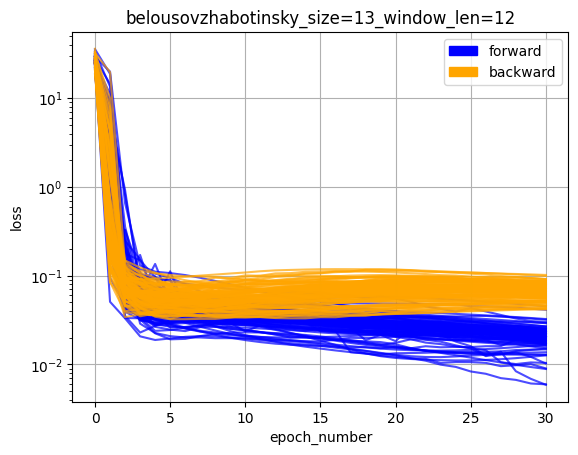

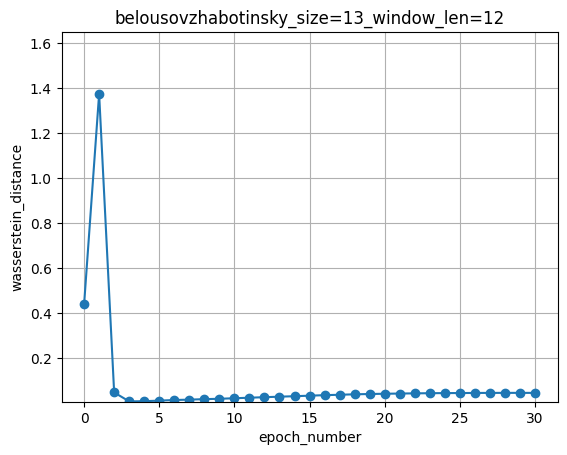

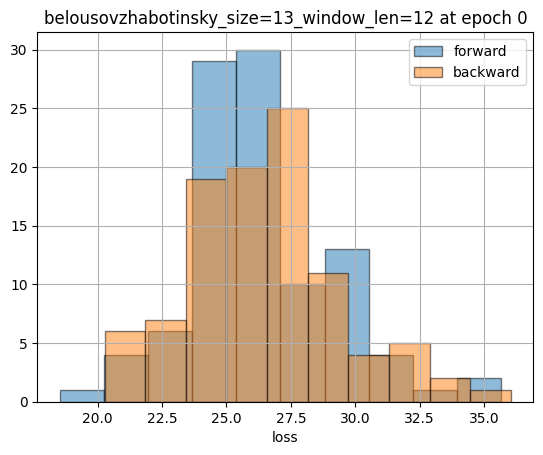

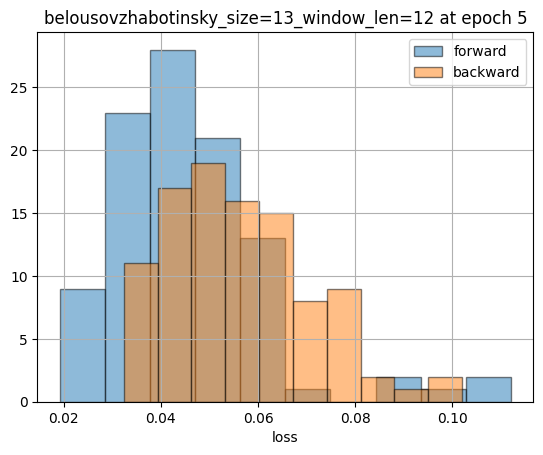

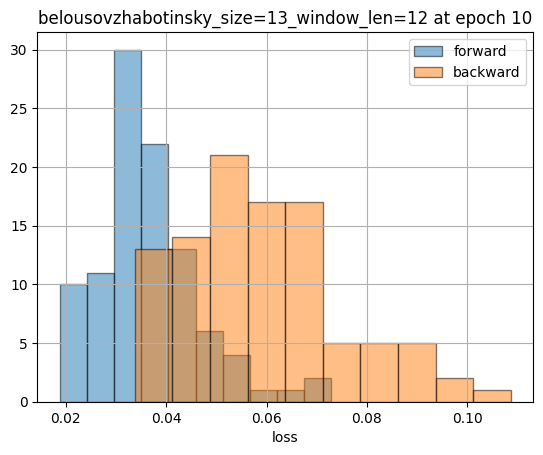

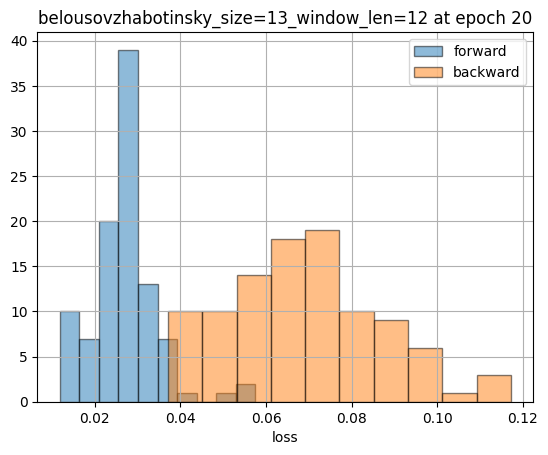

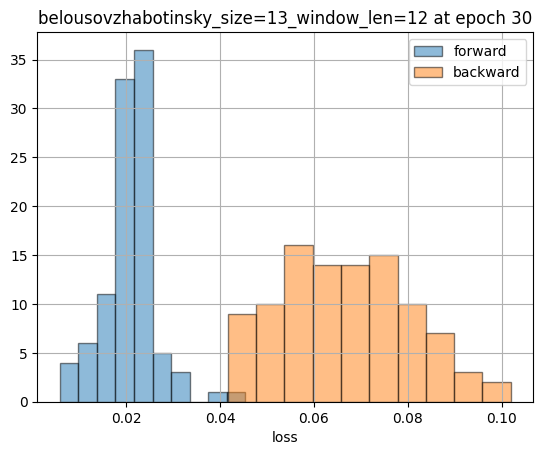

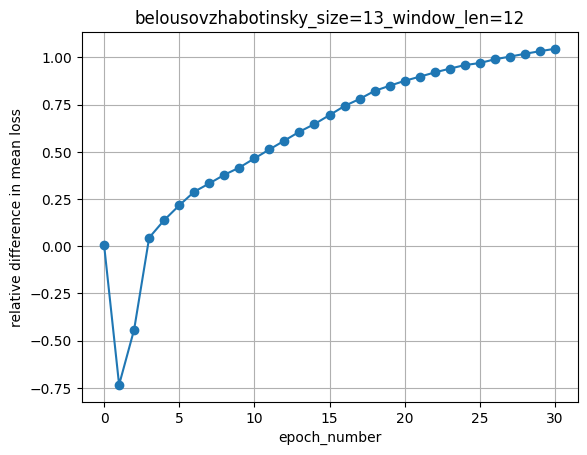

In [11]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=12.json")

## belousovzhabotinsky_size=13_window_len=25

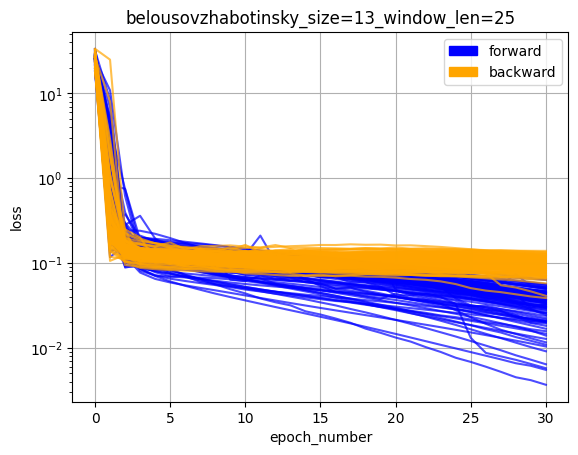

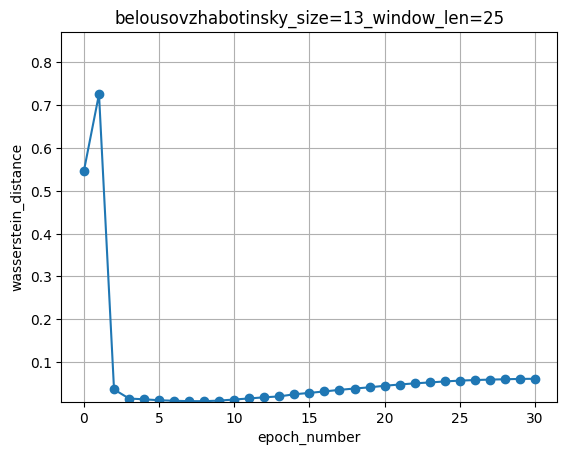

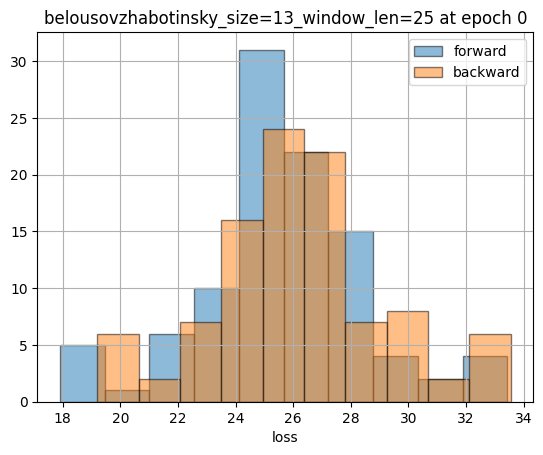

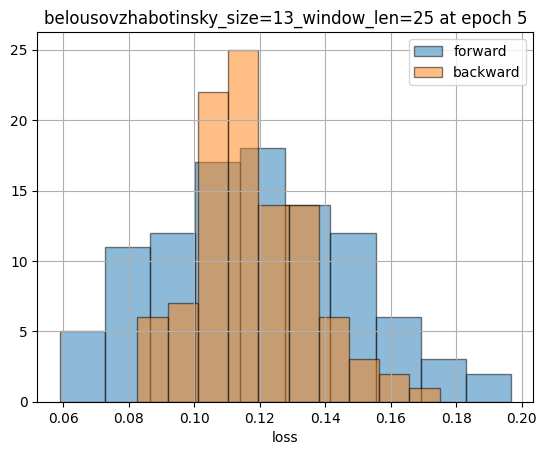

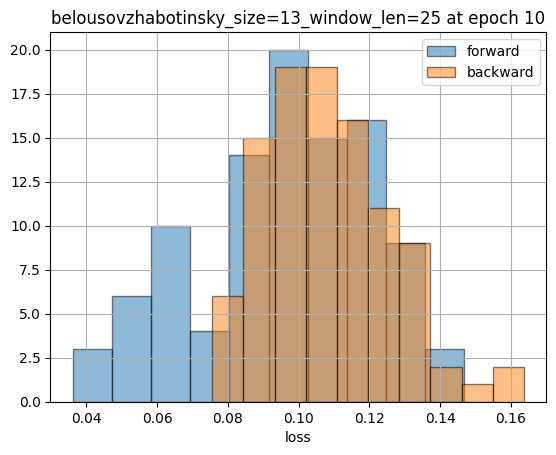

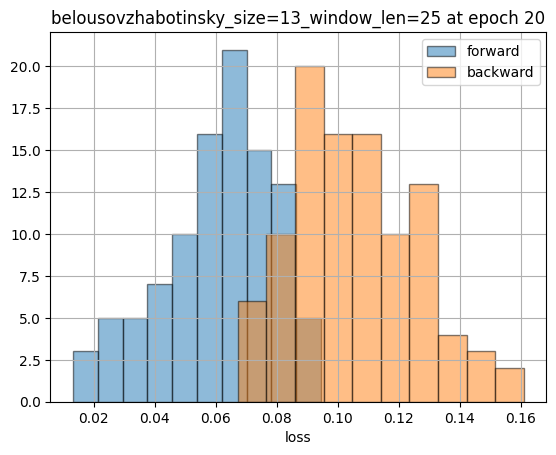

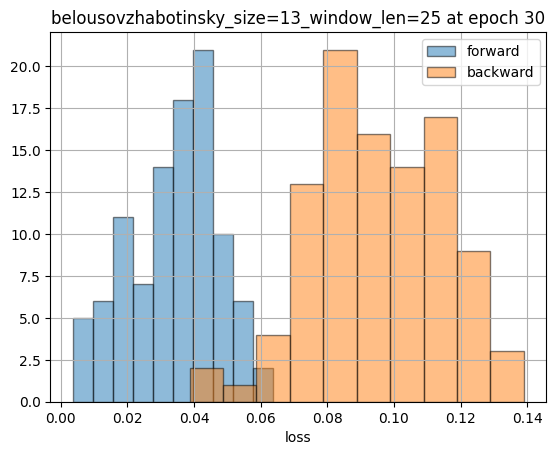

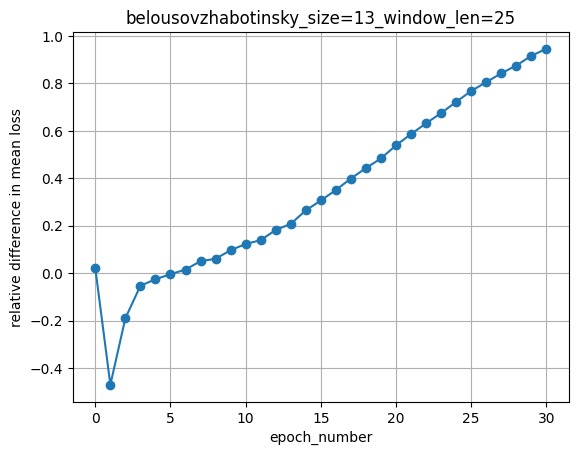

In [12]:
all_plots_for_datafile("20230507_distributions/belousovzhabotinsky_size=13_window_len=25.json")

## doublependulum_size=13_window_len=5

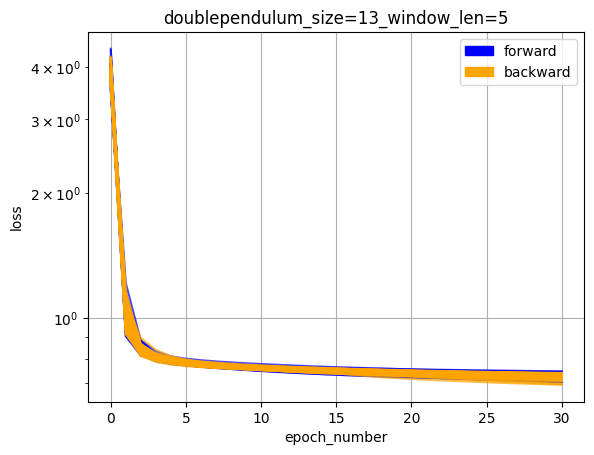

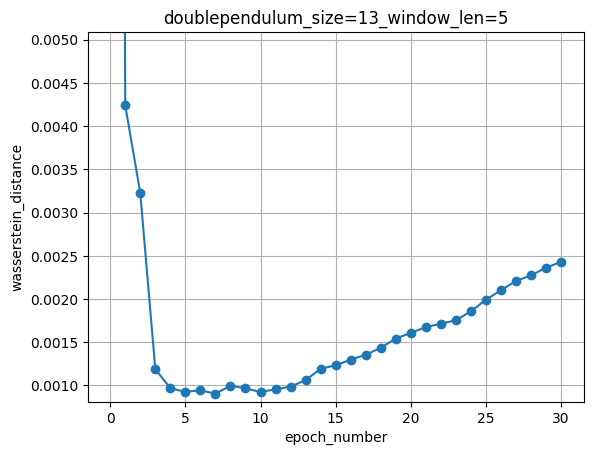

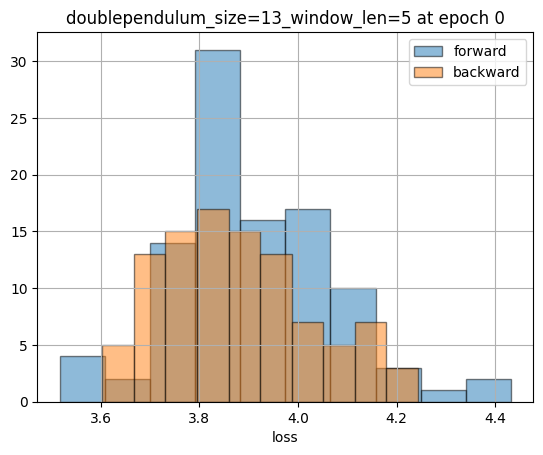

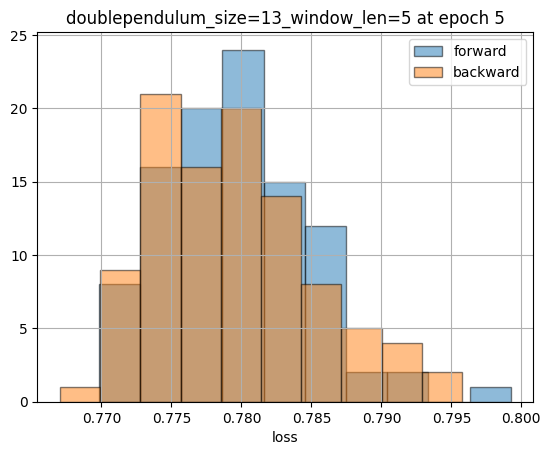

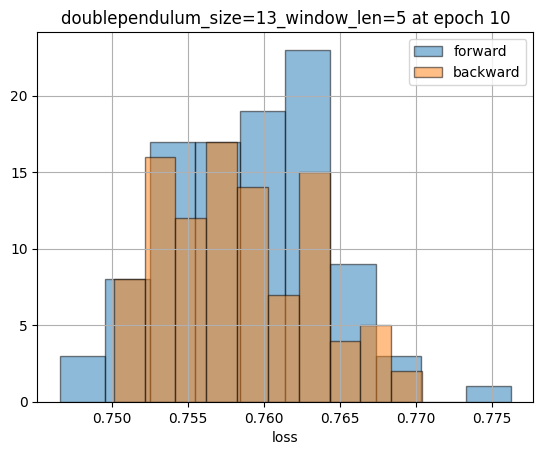

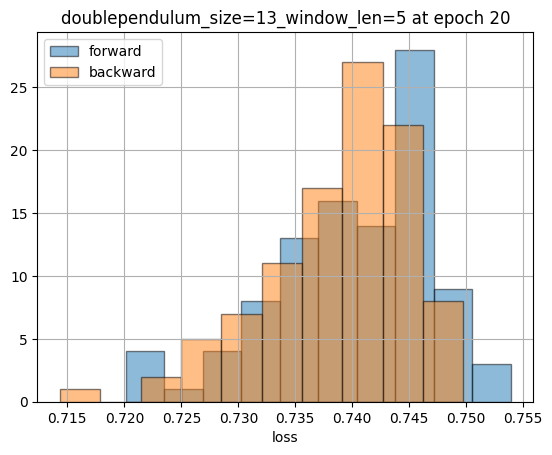

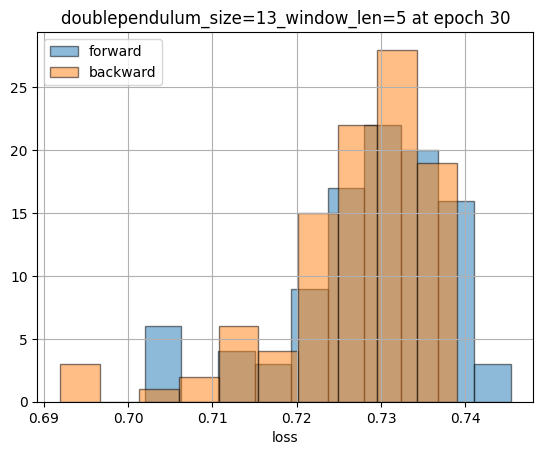

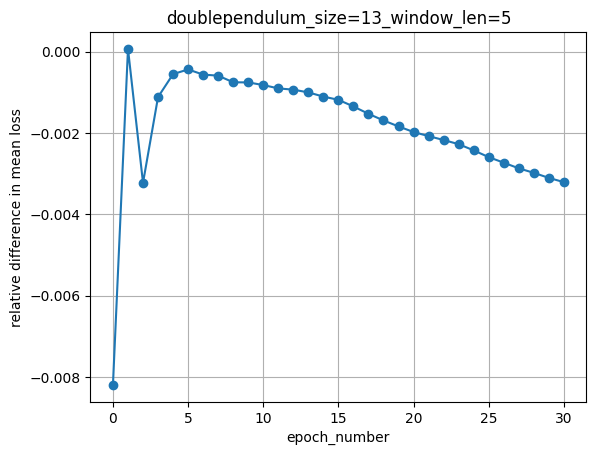

In [13]:
all_plots_for_datafile("20230507_distributions/doublependulum_size=13_window_len=5.json")

## All relmeandiffs in one plot

In [14]:
root, _, files = next(os.walk("20230507_distributions/"))
files = [os.path.join(root, f) for f in files]
loss_distributions = [LossDistribution(path) for path in files]
files

['20230507_distributions/doublependulum_size=13_window_len=5.json',
 '20230507_distributions/doublependulum_size=13_window_len=12.json',
 '20230507_distributions/kepler_size=13_window_len=5.json',
 '20230507_distributions/lorenz_size=13_window_len=5.json',
 '20230507_distributions/kepler_size=13_window_len=12.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=25.json',
 '20230507_distributions/kepler_size=13_window_len=25.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=5.json',
 '20230507_distributions/lorenz_size=13_window_len=25.json',
 '20230507_distributions/doublependulum_size=13_window_len=25.json',
 '20230507_distributions/lorenz_size=13_window_len=12.json',
 '20230507_distributions/belousovzhabotinsky_size=13_window_len=12.json']

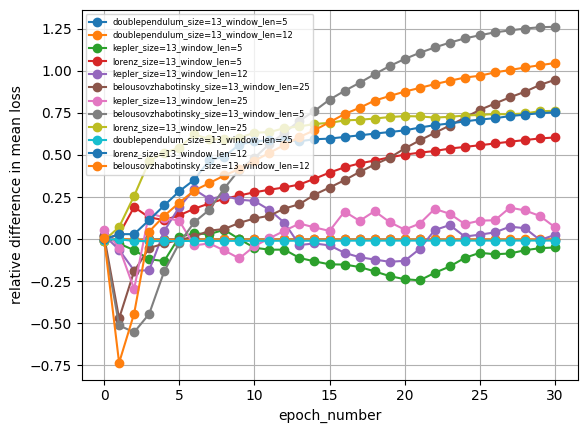

In [15]:
def plot_relmeandiffs(loss_distributions: List[LossDistribution]) -> None:
    for l in loss_distributions:
        plt.plot(l.relmeandiff_all(), "o-", label=l.label)    
    plt.grid()
    plt.xlabel("epoch_number")
    plt.ylabel("relative difference in mean loss")
    plt.legend(prop={"size":6})
    plt.show()
    
plot_relmeandiffs(loss_distributions)

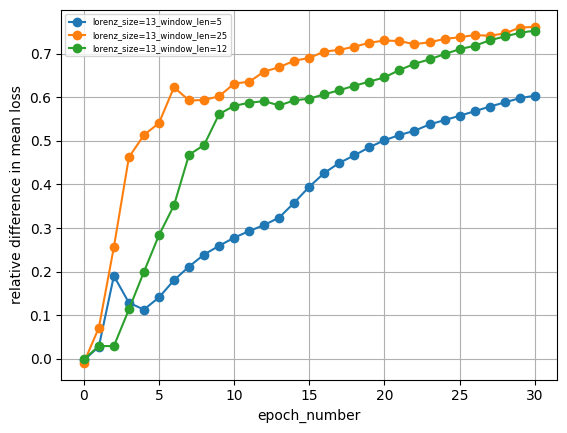

In [16]:
plot_relmeandiffs([l for l in loss_distributions if "lorenz" in l.filepath])

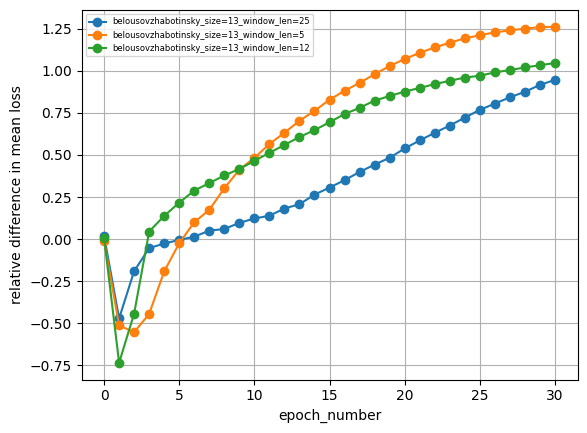

In [17]:
plot_relmeandiffs([l for l in loss_distributions if "belousov" in l.filepath])

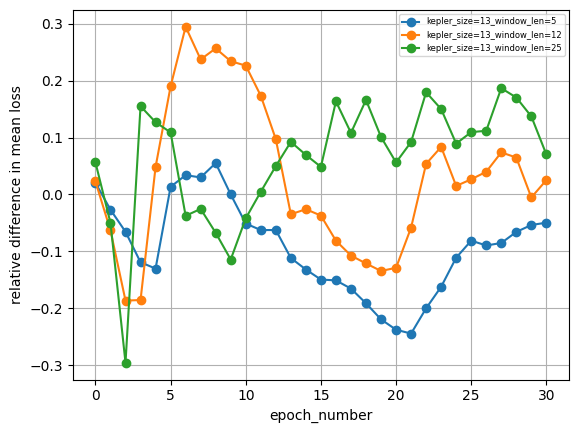

In [18]:
plot_relmeandiffs([l for l in loss_distributions if "kepler" in l.filepath])

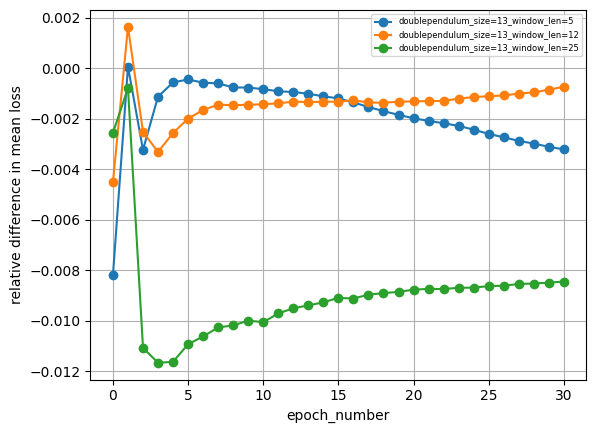

In [19]:
plot_relmeandiffs([l for l in loss_distributions if "doublependulum" in l.filepath])

## Damped oscillator

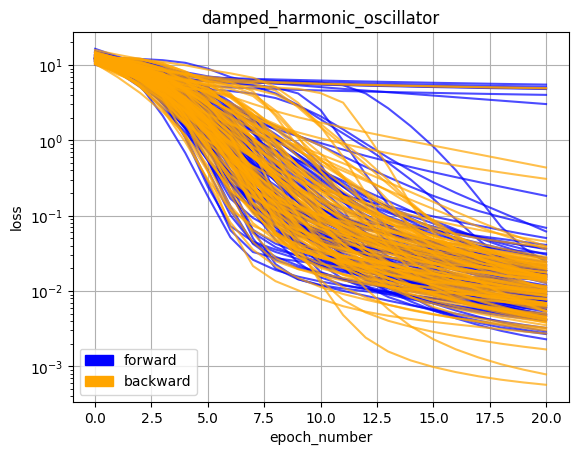

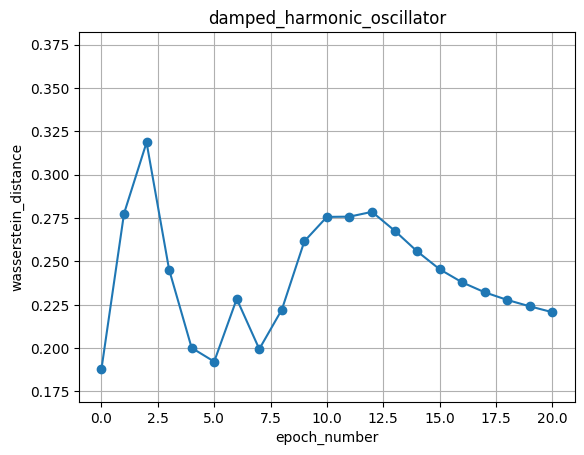

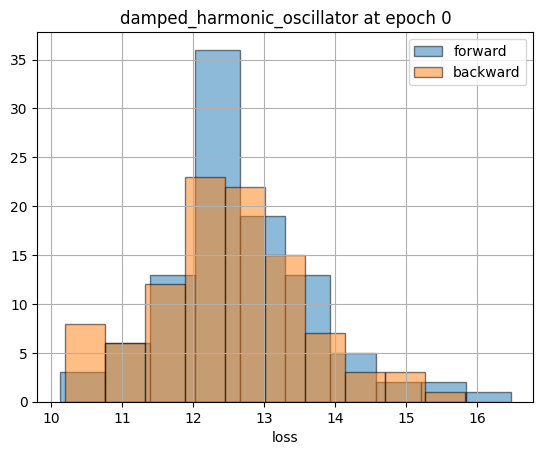

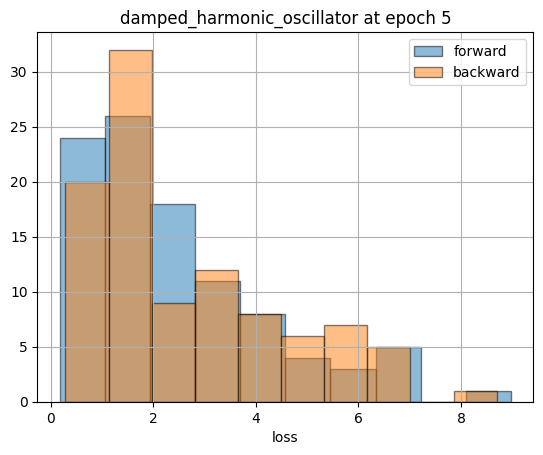

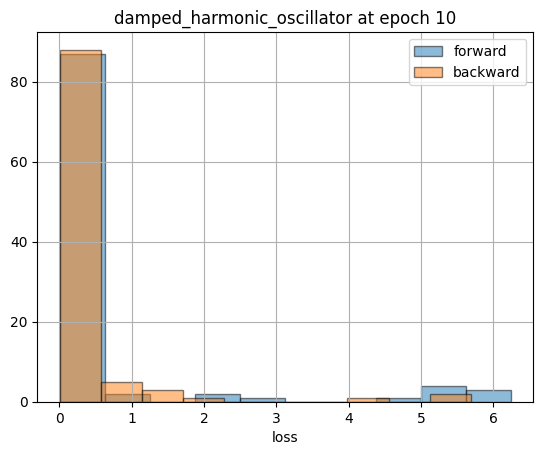

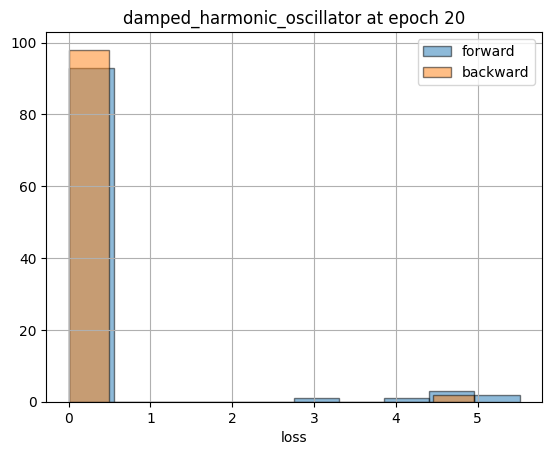

IndexError: index 30 is out of bounds for axis 1 with size 21

In [4]:
all_plots_for_datafile("20230507_distributions/damped_harmonic_oscillator.json")

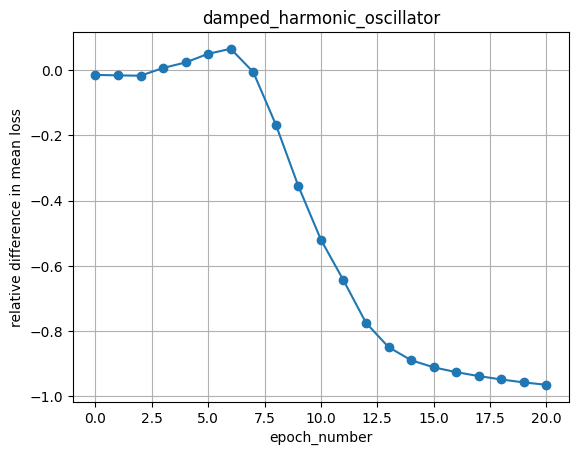

In [6]:
l = LossDistribution("20230507_distributions/damped_harmonic_oscillator.json")
l.plot_relmeandiff_vs_epoch()